# **Introduction**

In this notebook, the goal is to predict the milk quality. The central goal is to design a model that makes proper classifications for new milk samples. In other words, one which exhibits good generalization. by seven observable milk variables

We can classify milk into three groups: low, medium, and high quality. The milk dataset contains 429 instances of low quality, 374 instances of medium quality, and 256 instances of high quality.

This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of milk.
This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color:

1. pH: This feature defines pH of the milk, which is in the range of 3 to 9.5.

2. Temperature: This feature defines the temperature of the milk, and its range is from 34'C to 90'C.

3. Taste: This feature defines the taste of the milk and takes the possibles values: 1 (good) or 0 (bad).

4. Odor: This feature defines the odor of the milk and takes the possibles values: 1 (good) or 0 (bad).

5. Fat: This feature defines fat of the milk and takes the possibles values: 1 (good) or 0 (bad).

6. Turbidity: This feature defines the turbidity of the milk and takes the possibles values: 1 (good) or 0 (bad).

7. Color: This feature defines the color of the milk, which is in the range of 240 to 255.

8. Grade: This is the target and takes the values: low_quality,medium_quality or high_quality.

# **Data Gathering**

# **Data Exploration**

In [6]:
# Import necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [7]:
# Load data into a dataframe

# local --->
data = pd.read_csv('milknew.csv')

# colab or anywhere
# data = pd.read_csv('https://raw.githubusercontent.com/Salampuriavv/fluid-quality-detection-6th-sem/main/milknew.csv')

In [9]:
# Check the top 5 rows
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [10]:
# Check the last 5 rows
data.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [11]:
# Check rows, columns count
data.shape

(1059, 8)

In [12]:
# Check column headers
data.keys()

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [14]:
# Get a summary of listed cols
data[['pH','Temprature','Taste']].describe()

,pH,Temprature,Taste
count,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742
std,1.399679,10.098364,0.498046
min,3.000000,34.000000,0.000000
25%,6.500000,38.000000,0.000000
50%,6.700000,41.000000,1.000000
75%,6.800000,45.000000,1.000000
max,9.500000,90.000000,1.000000


In [15]:
# Check for null values
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [16]:
# Check for duplicates
data.duplicated().sum()

976

> The dataset has no key, this maybe the reason why we are picking up so many duplicate records.

# **Data Cleaning**

In [17]:
# Create a copy of the original dataset
data_cp = data.copy()

In [18]:
# Rename columns
data_cp = data_cp.rename(columns={'Temprature':'Temperature'})

# Remove any empty spaces in header col
data_cp.columns = data_cp.columns.str.replace(' ', '')

# **Data Visualization**

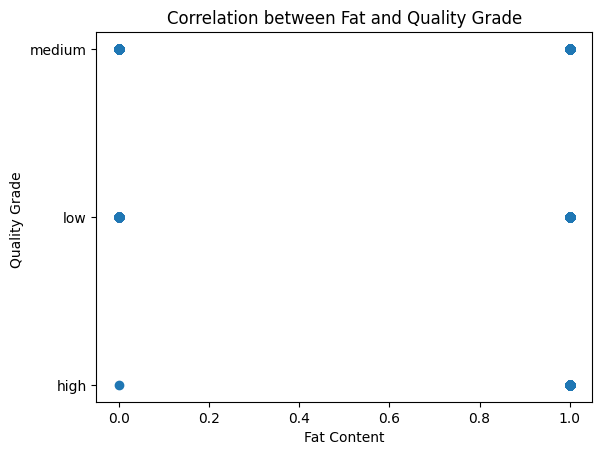

In [19]:
# plot a scatter plot to visualize any correlation between fat and quaity grade
plt.scatter(data_cp['Fat'], data_cp['Grade'])
plt.xlabel('Fat Content')
plt.ylabel('Quality Grade ')
plt.title('Correlation between Fat and Quality Grade')
plt.show()

In [20]:
counts = data['Grade'].value_counts()
grade_percentages = [(count/len(data_cp))*100 for count in counts]
grade_label = counts.index.tolist()

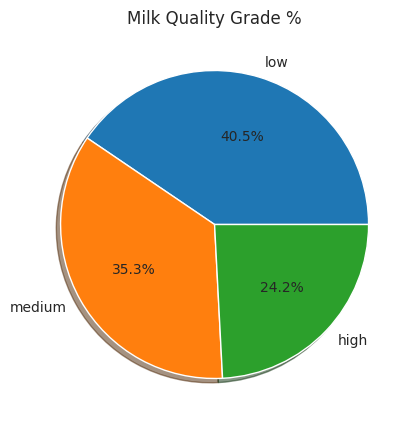

In [21]:
sb.set_style('dark')
plt.figure(figsize=(5,5))
plt.title('Milk Quality Grade %')
plt.pie(grade_percentages, labels=grade_label, autopct='%1.1f%%',shadow=True);

# **Train & Evaluate the Model**
Metrics such as accuracy, precision, and recall can be used measure the performance of the model.

In [22]:
# Split the dataset into features(to use to predict) and target variable(to predict)
X = data_cp.drop(['Grade'], axis=1)
y = data_cp['Grade']

In [23]:
'''
# Preprocess the data
# Encode categorical variables
# Not necessary in this case as the feature-values are already in the numerical category format
Le = LabelEncoder()
X['Taste'] = Le.fit_transform(X['Taste'])
X['Odor'] = Le.fit_transform(X['Odor'])
X['Fat'] = Le.fit_transform(X['Fat'])
X['Turbidity'] = Le.fit_transform(X['Turbidity'])
'''

"\n# Preprocess the data\n# Encode categorical variables\n# Not necessary in this case as the feature-values are already in the numerical category format\nLe = LabelEncoder()\nX['Taste'] = Le.fit_transform(X['Taste'])\nX['Odor'] = Le.fit_transform(X['Odor'])\nX['Fat'] = Le.fit_transform(X['Fat'])\nX['Turbidity'] = Le.fit_transform(X['Turbidity'])\n"

In [24]:
print(X.columns)

Index(['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour'], dtype='object')


Support Vector Machines (SVM) is sensitive to differences in scale and distribution, so using a scaler-object we can: standardize and normalize the features.

In [25]:
# Scale numerical variables
scaler = StandardScaler()

# Transform col-values to have zero mean and variance
X[['pH', 'Temperature', 'Fat', 'Turbidity']] = scaler.fit_transform(X[['pH', 'Temperature', 'Fat', 'Turbidity']])

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Train and evaluate a support vector machine classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Accuracy of SVM classifier: {:.2f}%".format(accuracy_svm * 100))
print('------------------------------------------------------------------')
print(classification_report(y_test, y_pred_svm))

Accuracy of SVM classifier: 87.42%
------------------------------------------------------------------
              precision    recall  f1-score   support

        high       0.74      0.92      0.82        76
         low       0.90      0.85      0.88       115
      medium       0.96      0.87      0.91       127

    accuracy                           0.87       318
   macro avg       0.87      0.88      0.87       318
weighted avg       0.89      0.87      0.88       318



In [28]:
# Perform random classifier classification
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Accuracy of Random Forest classifier: {:.2f}%".format(accuracy_rf * 100))
print('------------------------------------------------------------------')
print(classification_report(y_test, y_pred_rf))

Accuracy of Random Forest classifier: 99.69%
------------------------------------------------------------------
              precision    recall  f1-score   support

        high       0.99      1.00      0.99        76
         low       1.00      0.99      1.00       115
      medium       1.00      1.00      1.00       127

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318

